In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [12]:
!pip install textblob
!pip install seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

INFO: pip is looking at multiple versions of textblob to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement nltk>=3.8 (from textblob) (from versions: none)
ERROR: No matching distribution found for nltk>=3.8


In [39]:

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
     

data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
     

data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [41]:

col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', names=col_names)
     

df.head()
     

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [42]:

df.describe

<bound method NDFrame.describe of          ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac wind

In [43]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [44]:

df.duplicated().sum()

2700

In [45]:

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [46]:
df.shape

(71982, 4)

In [47]:

sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21787
Positive      19811
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64

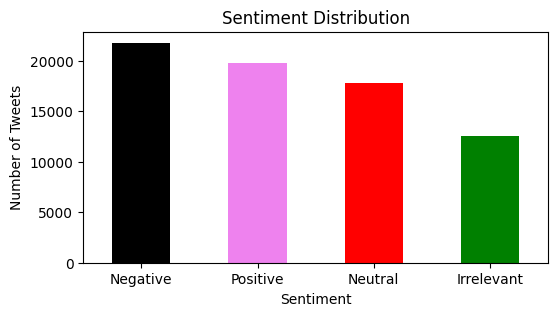

In [50]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['black', 'violet', 'red', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [51]:

brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Sentiment
Neutral       823
Negative      752
Positive      575
Irrelevant    169
Name: count, dtype: int64

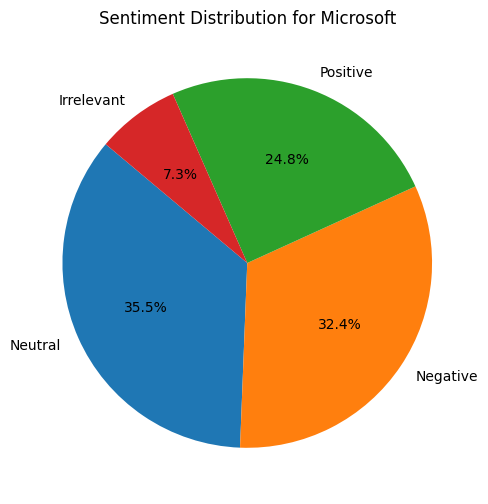

In [52]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()